# Modules

In [1]:
import json
from glob import glob
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from proj.conf import abstract, introduction
from proj.promptfoo import read_results

# Settings

These settings depend on the manuscript section

In [2]:
TEST_TYPES = [
    "Spelling/grammar",
    "Formatting",
    "Structure",
]

# Get list of outputs for each model

In [3]:
INPUT_DIR = abstract.CASES / "phenoplier" / "outputs"
assert INPUT_DIR.exists
display(INPUT_DIR)

PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs')

In [4]:
INPUT_MODELS = sorted(list(INPUT_DIR.glob("*")))

In [5]:
INPUT_MODELS

[PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/claude-3-haiku-20240307'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/claude-3-opus-20240229'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/claude-3-sonnet-20240229'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/gemma-2b-instruct-fp16'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/gpt-3.5-turbo-0125'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/gpt-4-0613'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/abstract/cases/phenoplier/outputs/gpt-4-turbo-2024-04-09'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor

# Read all results

In [6]:
results = []
for model in INPUT_MODELS:
    model_results = read_results(model)
    results.append(model_results)

In [7]:
len(results)

16

In [8]:
results = pd.concat(results, ignore_index=True)

In [9]:
results.shape

(6720, 10)

In [10]:
results.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [11]:
results["model"].value_counts()

model
claude-3-haiku-20240307             420
claude-3-opus-20240229              420
claude-3-sonnet-20240229            420
gemma-2b-instruct-fp16              420
gpt-3.5-turbo-0125                  420
gpt-4-0613                          420
gpt-4-turbo-2024-04-09              420
llama2-7b-chat-fp16                 420
llama3-70b-instruct-q5_1            420
llama3-8b-instruct-fp16             420
mistral-7b-instruct-fp16            420
mistral-7b-instruct-v0.2-fp16       420
mixtral-8x22b-instruct-v0.1-q5_1    420
mixtral-8x7b-instruct-v0.1-q8_0     420
starling-lm-7b-alpha-fp16           420
starling-lm-7b-beta-fp16            420
Name: count, dtype: int64

In [12]:
results["prompt"].value_counts()

prompt
baseline                   2240
candidate_with_metadata    2240
candidate                  2240
Name: count, dtype: int64

In [13]:
results["test_description"].value_counts()

test_description
Has no spelling errors                 1680
Starts with background                 1680
Describes method before results        1680
Ends with interpretation of results    1680
Name: count, dtype: int64

In [14]:
results["comp_type"].value_counts()

comp_type
Formatting          5760
Structure            720
Spelling/grammar     240
Name: count, dtype: int64

In [15]:
results["comp_desc"].value_counts()

comp_desc
Starts with capital letter                            960
Ends with a period                                    960
Is a single paragraph                                 960
Doesn't include manuscript title                      960
Doesn't reference authors, keywords, abstract, etc    960
Has roughly the same length as input                  960
Has no spelling errors                                240
Starts with background                                240
Describes method before results                       240
Ends with interpretation of results                   240
Name: count, dtype: int64

# Pass rate (`passed`, by promptfoo)

## Stats

In [16]:
df = results.copy()

In [17]:
df.shape

(6720, 10)

In [18]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [19]:
df["prompt"].value_counts()

prompt
baseline                   2240
candidate_with_metadata    2240
candidate                  2240
Name: count, dtype: int64

In [20]:
df["test_description"].value_counts()

test_description
Has no spelling errors                 1680
Starts with background                 1680
Describes method before results        1680
Ends with interpretation of results    1680
Name: count, dtype: int64

In [21]:
df["comp_type"].value_counts()

comp_type
Formatting          5760
Structure            720
Spelling/grammar     240
Name: count, dtype: int64

## Test level

### Sum and normalize `passed` by model and prompt

In [22]:
passed_unique = results.groupby(["model", "prompt"])["passed"].count()

In [23]:
assert passed_unique.unique().shape[0] == 1
n_tests_per_group = float(passed_unique.unique()[0])
display(n_tests_per_group)

140.0

In [24]:
df = results.groupby(["model", "prompt"])["passed"].sum().to_frame().reset_index()

In [25]:
df.head()

,model,prompt,passed
0,claude-3-haiku-20240307,baseline,7
1,claude-3-haiku-20240307,candidate,77
2,claude-3-haiku-20240307,candidate_with_metadata,77
3,claude-3-opus-20240229,baseline,0
4,claude-3-opus-20240229,candidate,140


In [26]:
df = df.assign(pass_rate=lambda x: x["passed"] / n_tests_per_group)

In [27]:
df.shape

(48, 4)

In [28]:
df.head()

,model,prompt,passed,pass_rate
0,claude-3-haiku-20240307,baseline,7,0.05
1,claude-3-haiku-20240307,candidate,77,0.55
2,claude-3-haiku-20240307,candidate_with_metadata,77,0.55
3,claude-3-opus-20240229,baseline,0,0.00
4,claude-3-opus-20240229,candidate,140,1.00


In [29]:
df.sort_values("pass_rate")

,model,prompt,passed,pass_rate
47,starling-lm-7b-beta-fp16,candidate_with_metadata,0,0.00
45,starling-lm-7b-beta-fp16,baseline,0,0.00
3,claude-3-opus-20240229,baseline,0,0.00
29,llama3-8b-instruct-fp16,candidate_with_metadata,0,0.00
28,llama3-8b-instruct-fp16,candidate,0,0.00
27,llama3-8b-instruct-fp16,baseline,0,0.00
26,llama3-70b-instruct-q5_1,candidate_with_metadata,0,0.00
9,gemma-2b-instruct-fp16,baseline,0,0.00
10,gemma-2b-instruct-fp16,candidate,0,0.00
11,gemma-2b-instruct-fp16,candidate_with_metadata,0,0.00


In [30]:
_df_stats = df["pass_rate"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    48.000000
mean      0.423958
std       0.377138
min       0.000000
25%       0.000000
50%       0.375000
75%       0.725000
max       1.000000
Name: pass_rate, dtype: float64

### Plot by prompt (sorted by scores on candidates)

In [31]:
# sort models by comp_score in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate", "candidate_with_metadata"))]
    .groupby("model")["pass_rate"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [32]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09']

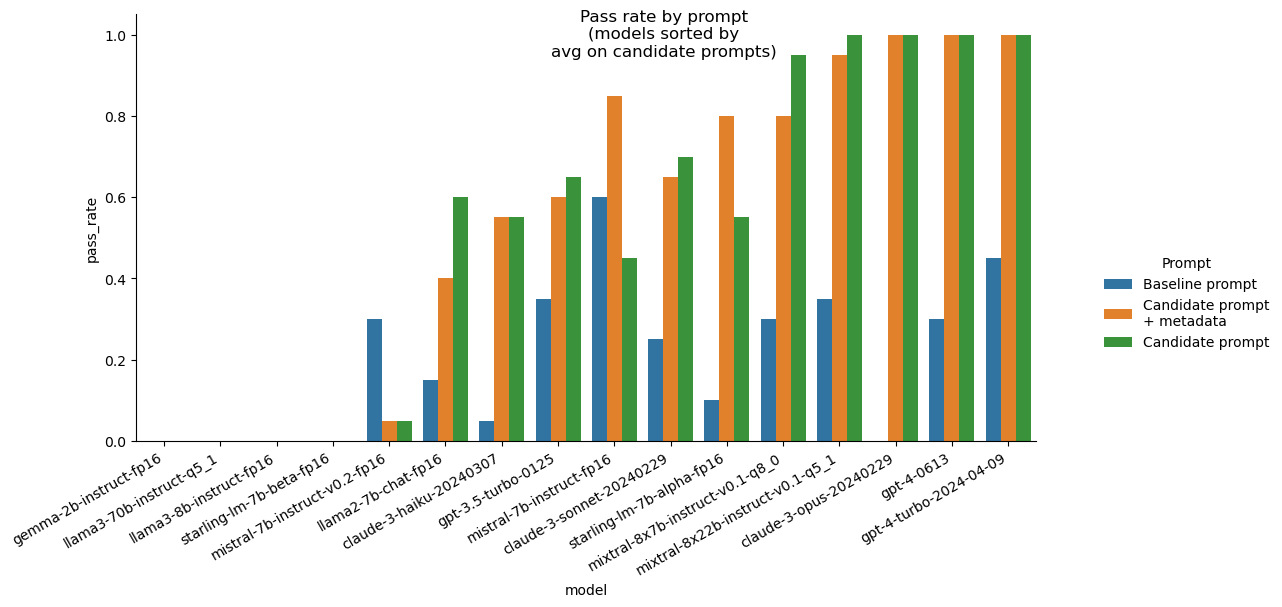

In [33]:
g = sns.catplot(
    data=df,
    x="model",
    y="pass_rate",
    hue="prompt",
    hue_order=["baseline", "candidate_with_metadata", "candidate"],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.fig.suptitle("Pass rate by prompt\n(models sorted by\navg on candidate prompts)")
g.set_xticklabels(rotation=30, ha="right")

g._legend.set_title("Prompt")
new_labels = ["Baseline prompt", "Candidate prompt\n+ metadata", "Candidate prompt"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

In [34]:
# this list is to check whether results match with those shown in the promptfoo's web interface
df.groupby(["model", "prompt"])["pass_rate"].mean()

model                             prompt                 
claude-3-haiku-20240307           baseline                   0.05
                                  candidate                  0.55
                                  candidate_with_metadata    0.55
claude-3-opus-20240229            baseline                   0.00
                                  candidate                  1.00
                                  candidate_with_metadata    1.00
claude-3-sonnet-20240229          baseline                   0.25
                                  candidate                  0.70
                                  candidate_with_metadata    0.65
gemma-2b-instruct-fp16            baseline                   0.00
                                  candidate                  0.00
                                  candidate_with_metadata    0.00
gpt-3.5-turbo-0125                baseline                   0.35
                                  candidate                  0.65
                  

## Assertion level and type

### Sum and normalize `passed` by model and test type

In [35]:
passed_unique = results.groupby(["model", "prompt", "comp_type"])["comp_pass"].count()
display(passed_unique)
assert passed_unique.unique().shape[0] == len(TEST_TYPES)

model                     prompt                   comp_type       
claude-3-haiku-20240307   baseline                 Formatting          120
                                                   Spelling/grammar      5
                                                   Structure            15
                          candidate                Formatting          120
                                                   Spelling/grammar      5
                                                                      ... 
starling-lm-7b-beta-fp16  candidate                Spelling/grammar      5
                                                   Structure            15
                          candidate_with_metadata  Formatting          120
                                                   Spelling/grammar      5
                                                   Structure            15
Name: comp_pass, Length: 144, dtype: int64

In [36]:
n_tests_per_group = passed_unique.loc[
    passed_unique.index[0][0], passed_unique.index[0][1]
]
display(n_tests_per_group)

comp_type
Formatting          120
Spelling/grammar      5
Structure            15
Name: comp_pass, dtype: int64

Understanding the above numbers:
* Formatting: 120 -> 6 per test * 4 test descriptions * 5 repetitions = 120
* Spelling/grammar: 5 -> 1 per test * 1 test descriptions * 5 repetitions = 5
* Structure: 5 -> 1 per test * 3 test descriptions * 5 repetitions = 15

In [37]:
df = (
    results.groupby(["model", "prompt", "comp_type"])["comp_pass"]
    .sum()
    .to_frame()
    .reset_index()
)

In [38]:
df.head()

,model,prompt,comp_type,comp_pass
0,claude-3-haiku-20240307,baseline,Formatting,98
1,claude-3-haiku-20240307,baseline,Spelling/grammar,2
2,claude-3-haiku-20240307,baseline,Structure,5
3,claude-3-haiku-20240307,candidate,Formatting,112
4,claude-3-haiku-20240307,candidate,Spelling/grammar,5


In [39]:
# for testing purposes
df[df["model"].str.contains("opus")]

,model,prompt,comp_type,comp_pass
9,claude-3-opus-20240229,baseline,Formatting,100
10,claude-3-opus-20240229,baseline,Spelling/grammar,2
11,claude-3-opus-20240229,baseline,Structure,5
12,claude-3-opus-20240229,candidate,Formatting,120
13,claude-3-opus-20240229,candidate,Spelling/grammar,5
14,claude-3-opus-20240229,candidate,Structure,15
15,claude-3-opus-20240229,candidate_with_metadata,Formatting,120
16,claude-3-opus-20240229,candidate_with_metadata,Spelling/grammar,5
17,claude-3-opus-20240229,candidate_with_metadata,Structure,15


In [40]:
df.apply(lambda x: x["comp_pass"] / n_tests_per_group[x["comp_type"]], axis=1)

0      0.816667
1      0.400000
2      0.333333
3      0.933333
4      1.000000
         ...   
139    1.000000
140    0.933333
141    0.675000
142    1.000000
143    0.933333
Length: 144, dtype: float64

In [41]:
df = df.assign(
    pass_rate=df.apply(
        lambda x: x["comp_pass"] / n_tests_per_group[x["comp_type"]], axis=1
    )
)

In [42]:
df.shape

(144, 5)

In [43]:
df.head()

,model,prompt,comp_type,comp_pass,pass_rate
0,claude-3-haiku-20240307,baseline,Formatting,98,0.816667
1,claude-3-haiku-20240307,baseline,Spelling/grammar,2,0.400000
2,claude-3-haiku-20240307,baseline,Structure,5,0.333333
3,claude-3-haiku-20240307,candidate,Formatting,112,0.933333
4,claude-3-haiku-20240307,candidate,Spelling/grammar,5,1.000000


In [44]:
df.sort_values("pass_rate")

,model,prompt,comp_type,comp_pass,pass_rate
20,claude-3-sonnet-20240229,baseline,Structure,0,0.0
82,llama3-8b-instruct-fp16,baseline,Spelling/grammar,0,0.0
137,starling-lm-7b-beta-fp16,baseline,Structure,0,0.0
128,starling-lm-7b-alpha-fp16,baseline,Structure,0,0.0
74,llama3-70b-instruct-q5_1,baseline,Structure,0,0.0
...,...,...,...,...,...
91,mistral-7b-instruct-fp16,baseline,Spelling/grammar,5,1.0
90,mistral-7b-instruct-fp16,baseline,Formatting,120,1.0
23,claude-3-sonnet-20240229,candidate,Structure,15,1.0
97,mistral-7b-instruct-fp16,candidate_with_metadata,Spelling/grammar,5,1.0


In [45]:
_df_stats = df["pass_rate"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    144.000000
mean       0.800868
std        0.292294
min        0.000000
25%        0.706250
50%        0.970833
75%        1.000000
max        1.000000
Name: pass_rate, dtype: float64

### Plot by test type + `candidate` prompt

In [46]:
# sort models by comp_score in candidate prompt only (which is the best performing one in most models)
sorted_models = (
    df[df["prompt"].isin(("candidate",))]
    .groupby(["model", "comp_type"])["pass_rate"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [47]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q5_1']

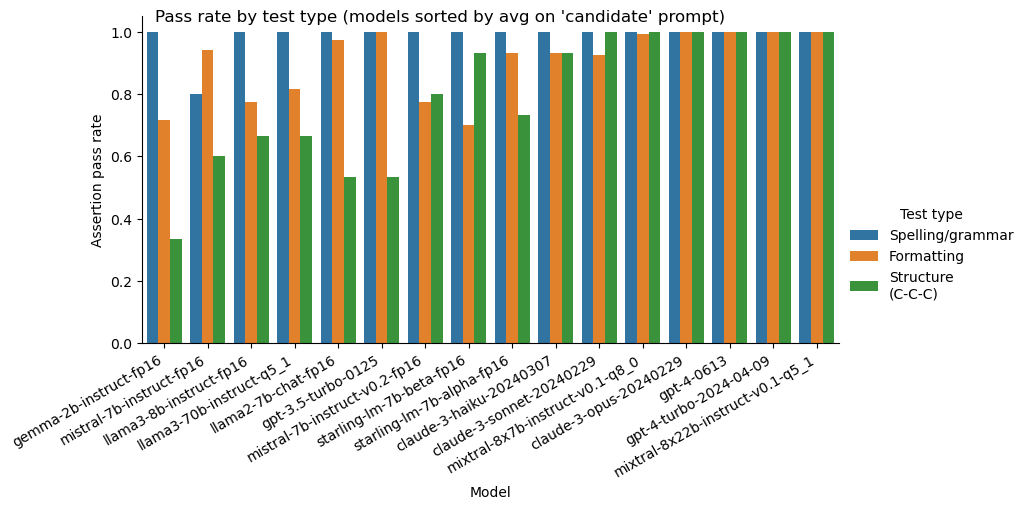

In [48]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    # data=df,
    # col="prompt",
    # col_wrap=1,
    x="model",
    y="pass_rate",
    hue="comp_type",
    hue_order=[
        "Spelling/grammar",
        "Formatting",
        "Structure",
    ],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.fig.suptitle(
    "Pass rate by test type (models sorted by avg on 'candidate' prompt)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion pass rate")

g._legend.set_title("Test type")
new_labels = [
    "Spelling/grammar",
    "Formatting",
    "Structure\n(C-C-C)",
]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

In [49]:
df[df["prompt"] == "candidate"].groupby(["model", "comp_type"])["pass_rate"].mean()

model                             comp_type       
claude-3-haiku-20240307           Formatting          0.933333
                                  Spelling/grammar    1.000000
                                  Structure           0.933333
claude-3-opus-20240229            Formatting          1.000000
                                  Spelling/grammar    1.000000
                                  Structure           1.000000
claude-3-sonnet-20240229          Formatting          0.925000
                                  Spelling/grammar    1.000000
                                  Structure           1.000000
gemma-2b-instruct-fp16            Formatting          0.716667
                                  Spelling/grammar    1.000000
                                  Structure           0.333333
gpt-3.5-turbo-0125                Formatting          1.000000
                                  Spelling/grammar    1.000000
                                  Structure           0.533333
gpt-

### Plot by test type (no spelling/grammar) + `candidate` prompt

In [50]:
# sort models by score_avg in candidate prompts only (not baseline)
sorted_models = (
    df[
        df["prompt"].isin(("candidate",))
        & df["comp_type"].isin(("Formatting", "Structure"))
    ]
    .groupby(["model", "comp_type"])["pass_rate"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [51]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q5_1']

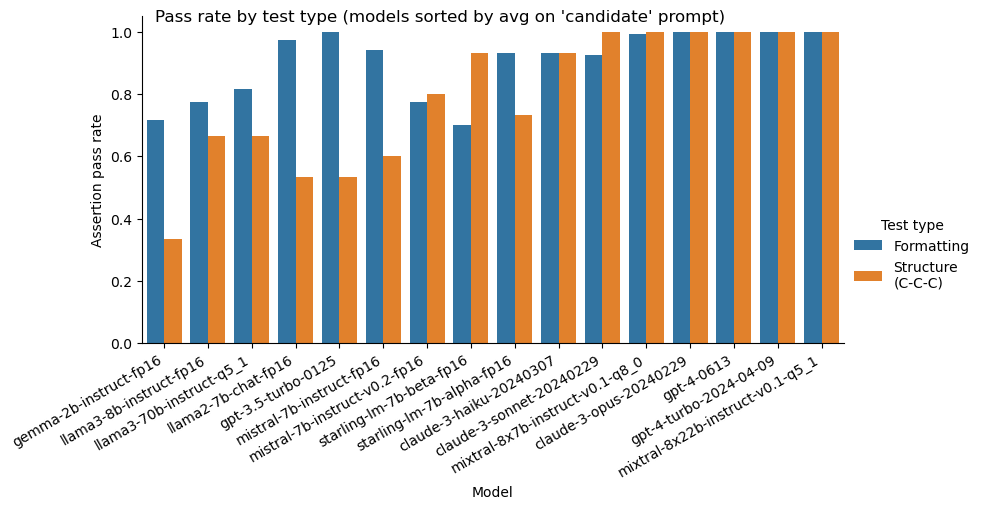

In [52]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    x="model",
    y="pass_rate",
    hue="comp_type",
    hue_order=[
        # "Spelling/grammar",
        "Formatting",
        "Structure",
    ],
    kind="bar",
    order=sorted_models,
    errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.fig.suptitle(
    "Pass rate by test type (models sorted by avg on 'candidate' prompt)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion pass rate")

g._legend.set_title("Test type")
new_labels = [
    # "Spelling/grammar",
    "Formatting",
    "Structure\n(C-C-C)",
]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

## Assertion level and description (`comp_desc`)

### Sum and normalize `passed` by model and test type

In [53]:
passed_unique = results.groupby(["model", "prompt", "comp_desc"])["comp_pass"].count()
display(passed_unique)
assert passed_unique.unique().shape[0] == 2

model                     prompt                   comp_desc                                         
claude-3-haiku-20240307   baseline                 Describes method before results                        5
                                                   Doesn't include manuscript title                      20
                                                   Doesn't reference authors, keywords, abstract, etc    20
                                                   Ends with a period                                    20
                                                   Ends with interpretation of results                    5
                                                                                                         ..
starling-lm-7b-beta-fp16  candidate_with_metadata  Has no spelling errors                                 5
                                                   Has roughly the same length as input                  20
                                  

In [54]:
n_tests_per_group = passed_unique.loc[
    passed_unique.index[0][0], passed_unique.index[0][1]
]
display(n_tests_per_group)

comp_desc
Describes method before results                        5
Doesn't include manuscript title                      20
Doesn't reference authors, keywords, abstract, etc    20
Ends with a period                                    20
Ends with interpretation of results                    5
Has no spelling errors                                 5
Has roughly the same length as input                  20
Is a single paragraph                                 20
Starts with background                                 5
Starts with capital letter                            20
Name: comp_pass, dtype: int64

Understanding the above numbers:
* 5 -> 1 per test * 1 test descriptions * 5 repetitions = 5
* 20 -> 1 per test * 4 test descriptions * 5 repetitions = 20

In [55]:
df = (
    results.groupby(["model", "prompt", "comp_desc"])["comp_pass"]
    .sum()
    .to_frame()
    .reset_index()
)

In [56]:
df.head()

,model,prompt,comp_desc,comp_pass
0,claude-3-haiku-20240307,baseline,Describes method before results,0
1,claude-3-haiku-20240307,baseline,Doesn't include manuscript title,19
2,claude-3-haiku-20240307,baseline,"Doesn't reference authors, keywords, abstract,...",20
3,claude-3-haiku-20240307,baseline,Ends with a period,19
4,claude-3-haiku-20240307,baseline,Ends with interpretation of results,1


In [57]:
# for testing purposes
df[df["model"].str.contains("opus")]

,model,prompt,comp_desc,comp_pass
30,claude-3-opus-20240229,baseline,Describes method before results,5
31,claude-3-opus-20240229,baseline,Doesn't include manuscript title,20
32,claude-3-opus-20240229,baseline,"Doesn't reference authors, keywords, abstract,...",20
33,claude-3-opus-20240229,baseline,Ends with a period,20
34,claude-3-opus-20240229,baseline,Ends with interpretation of results,0
35,claude-3-opus-20240229,baseline,Has no spelling errors,2
36,claude-3-opus-20240229,baseline,Has roughly the same length as input,20
37,claude-3-opus-20240229,baseline,Is a single paragraph,0
38,claude-3-opus-20240229,baseline,Starts with background,0
39,claude-3-opus-20240229,baseline,Starts with capital letter,20


In [58]:
df.apply(lambda x: x["comp_pass"] / n_tests_per_group[x["comp_desc"]], axis=1)

0      0.00
1      0.95
2      1.00
3      0.95
4      0.20
       ... 
475    1.00
476    1.00
477    0.00
478    1.00
479    0.05
Length: 480, dtype: float64

In [59]:
df = df.assign(
    pass_rate=df.apply(
        lambda x: x["comp_pass"] / n_tests_per_group[x["comp_desc"]], axis=1
    )
)

In [60]:
df.shape

(480, 5)

In [61]:
df.head()

,model,prompt,comp_desc,comp_pass,pass_rate
0,claude-3-haiku-20240307,baseline,Describes method before results,0,0.00
1,claude-3-haiku-20240307,baseline,Doesn't include manuscript title,19,0.95
2,claude-3-haiku-20240307,baseline,"Doesn't reference authors, keywords, abstract,...",20,1.00
3,claude-3-haiku-20240307,baseline,Ends with a period,19,0.95
4,claude-3-haiku-20240307,baseline,Ends with interpretation of results,1,0.20


In [62]:
df.sort_values("pass_rate")

,model,prompt,comp_desc,comp_pass,pass_rate
0,claude-3-haiku-20240307,baseline,Describes method before results,0,0.0
248,llama3-70b-instruct-q5_1,baseline,Starts with background,0,0.0
247,llama3-70b-instruct-q5_1,baseline,Is a single paragraph,0,0.0
34,claude-3-opus-20240229,baseline,Ends with interpretation of results,0,0.0
244,llama3-70b-instruct-q5_1,baseline,Ends with interpretation of results,0,0.0
...,...,...,...,...,...
202,gpt-4-turbo-2024-04-09,candidate_with_metadata,"Doesn't reference authors, keywords, abstract,...",20,1.0
201,gpt-4-turbo-2024-04-09,candidate_with_metadata,Doesn't include manuscript title,20,1.0
200,gpt-4-turbo-2024-04-09,candidate_with_metadata,Describes method before results,5,1.0
198,gpt-4-turbo-2024-04-09,candidate,Starts with background,5,1.0


In [63]:
_df_stats = df["pass_rate"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    480.000000
mean       0.801562
std        0.352774
min        0.000000
25%        0.800000
50%        1.000000
75%        1.000000
max        1.000000
Name: pass_rate, dtype: float64

### Plot by test type + `candidate` prompt

In [64]:
# sort models by comp_score in candidate prompt only (which is the best performing one in most models)
sorted_models = (
    df[df["prompt"].isin(("candidate",))]
    .groupby(["model", "comp_desc"])["pass_rate"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [65]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q5_1']

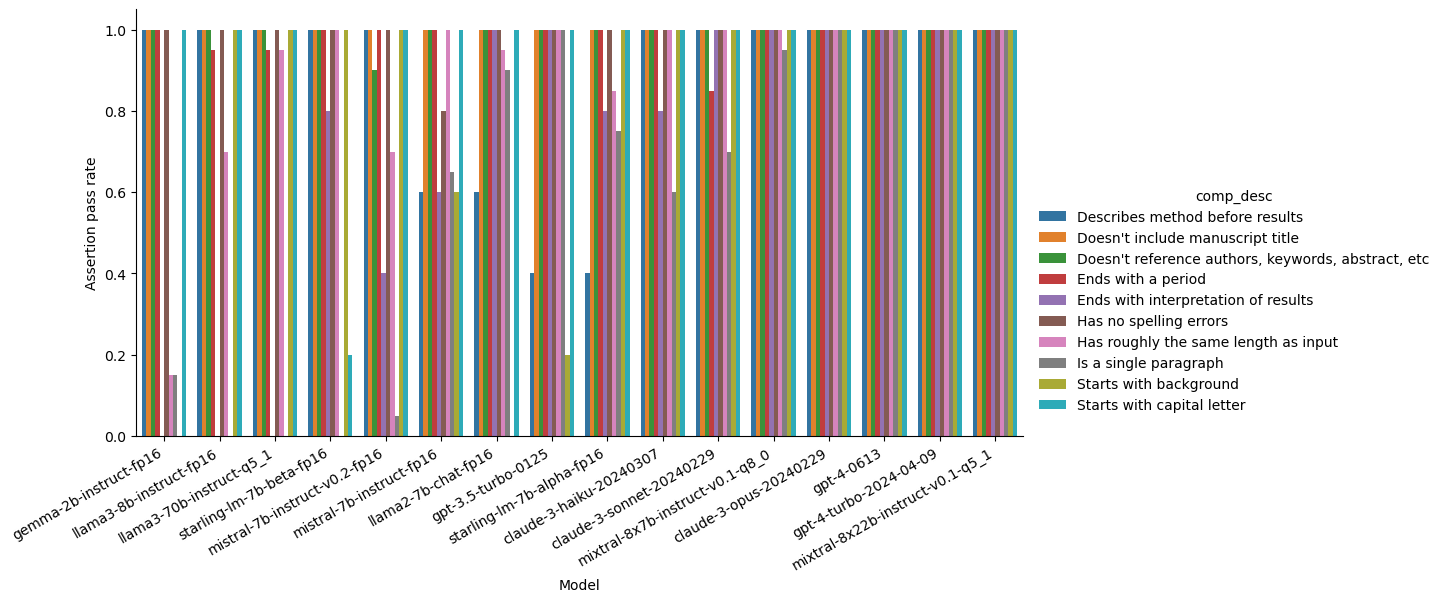

In [66]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    # data=df,
    # col="prompt",
    # col_wrap=1,
    x="model",
    y="pass_rate",
    hue="comp_desc",
    # hue_order=[
    #     "Spelling/grammar",
    #     "Formatting",
    #     "Structure",
    # ],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    height=5,
    aspect=2,
    legend_out=True,
)
# g.fig.suptitle("Pass rate by test type (models sorted by avg on 'candidate' prompt)", ha="left", x=0.11)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion pass rate")

# g._legend.set_title("Test type")
# new_labels = [
#     "Spelling/grammar",
#     "Formatting",
#     "Structure\n(C-C-C)",
# ]
# for t, l in zip(g._legend.texts, new_labels):
#     t.set_text(l)

# Average score (`score_avg`, by promptfoo)

In [67]:
# used to normalize
MAX_SCORE = 0.50

## Test level

### Normalize `score_avg`

In [68]:
df = results.copy()

In [69]:
df.shape

(6720, 10)

In [70]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [71]:
df.groupby("model")["score_avg"].mean().sort_values()

model
llama3-8b-instruct-fp16             0.285119
gemma-2b-instruct-fp16              0.288095
llama3-70b-instruct-q5_1            0.316071
llama2-7b-chat-fp16                 0.345238
starling-lm-7b-beta-fp16            0.358333
gpt-3.5-turbo-0125                  0.366071
mistral-7b-instruct-v0.2-fp16       0.376190
starling-lm-7b-alpha-fp16           0.379762
claude-3-haiku-20240307             0.399405
claude-3-sonnet-20240229            0.417262
mistral-7b-instruct-fp16            0.418452
claude-3-opus-20240229              0.426190
gpt-4-0613                          0.433333
mixtral-8x22b-instruct-v0.1-q5_1    0.436310
mixtral-8x7b-instruct-v0.1-q8_0     0.439286
gpt-4-turbo-2024-04-09              0.447619
Name: score_avg, dtype: float64

In [72]:
_df_stats = df["score_avg"].describe()
display(_df_stats)
assert _df_stats["max"] <= MAX_SCORE

count    6720.000000
mean        0.383296
std         0.143314
min         0.071429
25%         0.214286
50%         0.464286
75%         0.500000
max         0.500000
Name: score_avg, dtype: float64

In [73]:
df["score_avg"] = df["score_avg"] / MAX_SCORE

In [74]:
_df_stats = df["score_avg"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    6720.000000
mean        0.766592
std         0.286629
min         0.142857
25%         0.428571
50%         0.928571
75%         1.000000
max         1.000000
Name: score_avg, dtype: float64

In [75]:
df.groupby("model")["score_avg"].mean().sort_values()

model
llama3-8b-instruct-fp16             0.570238
gemma-2b-instruct-fp16              0.576190
llama3-70b-instruct-q5_1            0.632143
llama2-7b-chat-fp16                 0.690476
starling-lm-7b-beta-fp16            0.716667
gpt-3.5-turbo-0125                  0.732143
mistral-7b-instruct-v0.2-fp16       0.752381
starling-lm-7b-alpha-fp16           0.759524
claude-3-haiku-20240307             0.798810
claude-3-sonnet-20240229            0.834524
mistral-7b-instruct-fp16            0.836905
claude-3-opus-20240229              0.852381
gpt-4-0613                          0.866667
mixtral-8x22b-instruct-v0.1-q5_1    0.872619
mixtral-8x7b-instruct-v0.1-q8_0     0.878571
gpt-4-turbo-2024-04-09              0.895238
Name: score_avg, dtype: float64

### Plot by prompt (sorted by scores on candidates)

In [76]:
# sort models by score_avg in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate", "candidate_with_metadata"))]
    .groupby("model")["score_avg"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [77]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09']

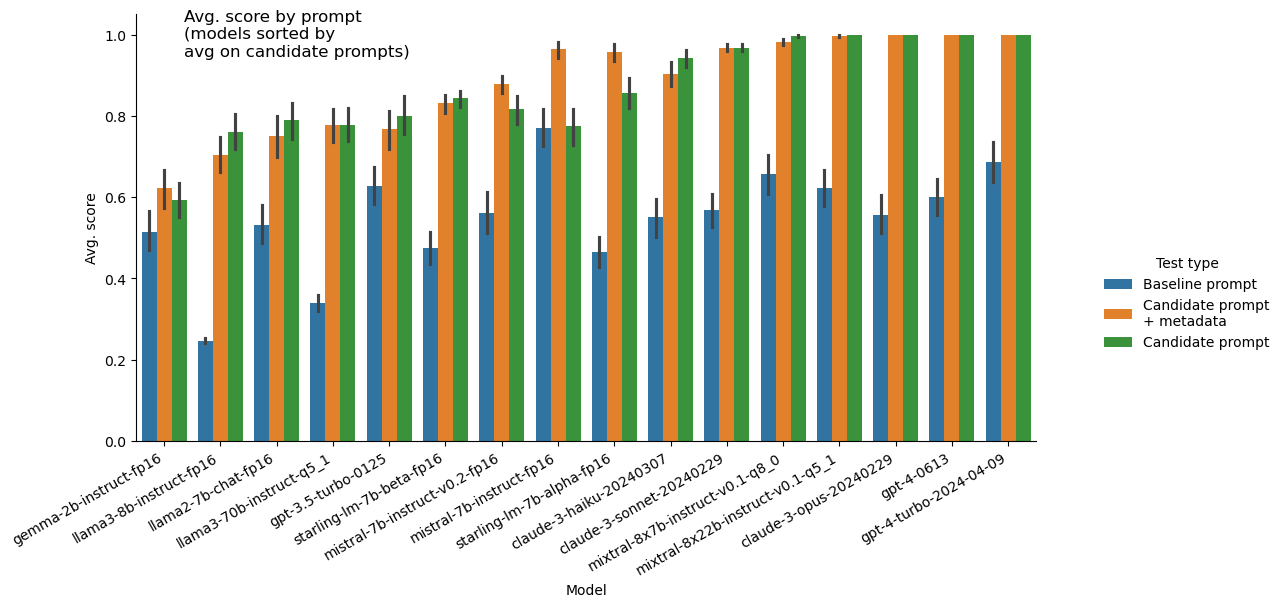

In [78]:
g = sns.catplot(
    data=df,
    x="model",
    y="score_avg",
    hue="prompt",
    hue_order=["baseline", "candidate_with_metadata", "candidate"],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.fig.suptitle(
    "Avg. score by prompt\n(models sorted by\navg on candidate prompts)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Avg. score")

g._legend.set_title("Test type")
new_labels = ["Baseline prompt", "Candidate prompt\n+ metadata", "Candidate prompt"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Score per assertion (`comp_score`)

## Stats

In [79]:
df = results.copy()

In [80]:
df.shape

(6720, 10)

In [81]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.142857,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, abstract,...",Formatting


In [82]:
df["prompt"].value_counts()

prompt
baseline                   2240
candidate_with_metadata    2240
candidate                  2240
Name: count, dtype: int64

In [83]:
df["test_description"].value_counts()

test_description
Has no spelling errors                 1680
Starts with background                 1680
Describes method before results        1680
Ends with interpretation of results    1680
Name: count, dtype: int64

In [84]:
df["comp_type"].value_counts()

comp_type
Formatting          5760
Structure            720
Spelling/grammar     240
Name: count, dtype: int64

## Normalize `comp_score`

In [85]:
df.groupby("model")["comp_score"].mean().sort_values()

model
llama3-8b-instruct-fp16             0.285119
gemma-2b-instruct-fp16              0.288095
llama3-70b-instruct-q5_1            0.316071
llama2-7b-chat-fp16                 0.345238
starling-lm-7b-beta-fp16            0.358333
gpt-3.5-turbo-0125                  0.366071
mistral-7b-instruct-v0.2-fp16       0.376190
starling-lm-7b-alpha-fp16           0.379762
claude-3-haiku-20240307             0.399405
claude-3-sonnet-20240229            0.417262
mistral-7b-instruct-fp16            0.418452
claude-3-opus-20240229              0.426190
gpt-4-0613                          0.433333
mixtral-8x22b-instruct-v0.1-q5_1    0.436310
mixtral-8x7b-instruct-v0.1-q8_0     0.439286
gpt-4-turbo-2024-04-09              0.447619
Name: comp_score, dtype: float64

In [86]:
# Warning: this values depend on those assigned in the `promptfooconfig.yaml` file
df.loc[df["comp_type"] == "Formatting", "comp_score"] = (
    df.loc[df["comp_type"] == "Formatting", "comp_score"] / 0.25
)
df.loc[df["comp_type"] == "Spelling/grammar", "comp_score"] = (
    df.loc[df["comp_type"] == "Spelling/grammar", "comp_score"] / 2.0
)
df.loc[df["comp_type"] == "Structure", "comp_score"] = (
    df.loc[df["comp_type"] == "Structure", "comp_score"] / 2.0
)
# only in introduction:
df.loc[df["comp_type"] == "Information accuracy", "comp_score"] = (
    df.loc[df["comp_type"] == "Information accuracy", "comp_score"] / 2.0
)

In [87]:
df.groupby("model")["comp_score"].mean().sort_values()

model
gemma-2b-instruct-fp16              0.652381
llama3-8b-instruct-fp16             0.657143
starling-lm-7b-beta-fp16            0.716667
llama3-70b-instruct-q5_1            0.747619
mistral-7b-instruct-v0.2-fp16       0.771429
llama2-7b-chat-fp16                 0.830952
claude-3-haiku-20240307             0.864286
starling-lm-7b-alpha-fp16           0.885714
claude-3-sonnet-20240229            0.919048
claude-3-opus-20240229              0.921429
mixtral-8x7b-instruct-v0.1-q8_0     0.923810
gpt-3.5-turbo-0125                  0.930952
mistral-7b-instruct-fp16            0.940476
mixtral-8x22b-instruct-v0.1-q5_1    0.961905
gpt-4-0613                          0.966667
gpt-4-turbo-2024-04-09              0.973810
Name: comp_score, dtype: float64

In [88]:
_df_stats = df["comp_score"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    6720.000000
mean        0.854018
std         0.353115
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: comp_score, dtype: float64

## Plot by prompt (sorted by scores on candidates)

In [89]:
# sort models by comp_score in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate", "candidate_with_metadata"))]
    .groupby("model")["comp_score"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [90]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09']

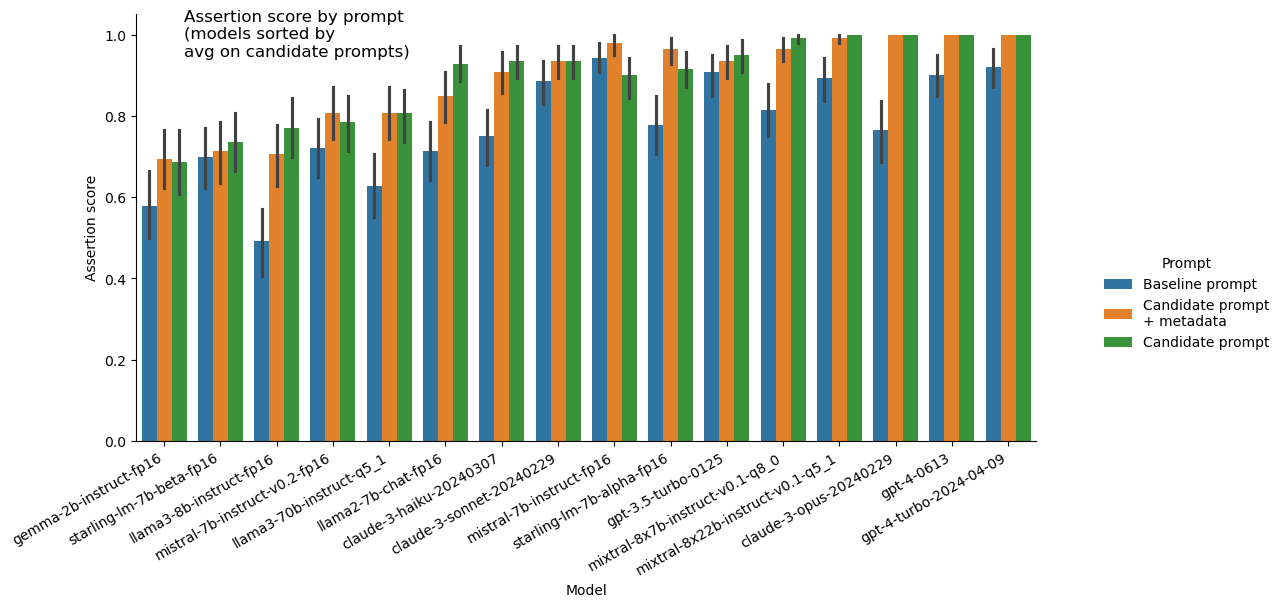

In [91]:
g = sns.catplot(
    data=df,
    x="model",
    y="comp_score",
    hue="prompt",
    hue_order=["baseline", "candidate_with_metadata", "candidate"],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.fig.suptitle(
    "Assertion score by prompt\n(models sorted by\navg on candidate prompts)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion score")

g._legend.set_title("Prompt")
new_labels = ["Baseline prompt", "Candidate prompt\n+ metadata", "Candidate prompt"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

## Plot by test type + `candidate` prompt

In [92]:
# sort models by score_avg in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate",))]
    .groupby(["model", "comp_type"])["comp_score"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [93]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q5_1']

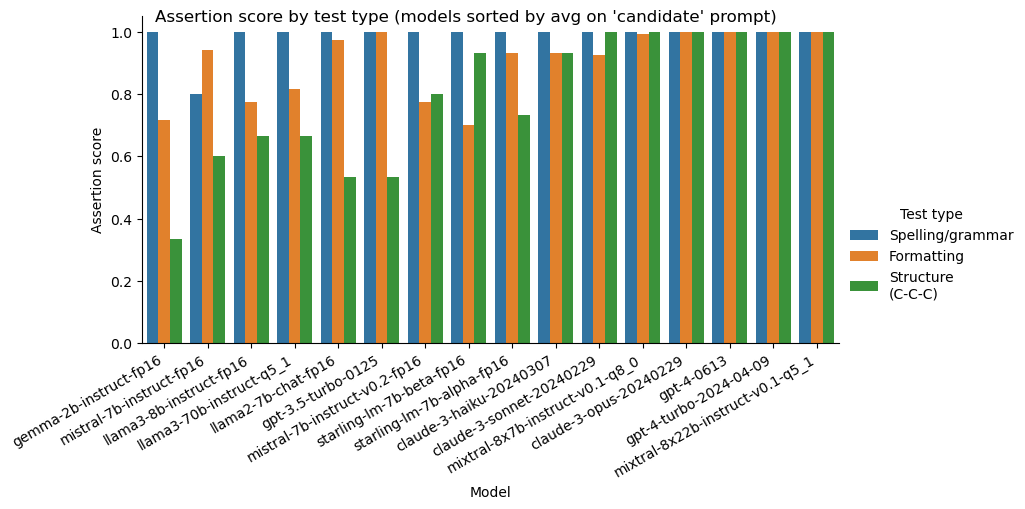

In [94]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    x="model",
    y="comp_score",
    hue="comp_type",
    hue_order=[
        "Spelling/grammar",
        "Formatting",
        "Structure",
    ],
    kind="bar",
    order=sorted_models,
    errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.fig.suptitle(
    "Assertion score by test type (models sorted by avg on 'candidate' prompt)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion score")

# leg = g.axes.flat[0].get_legend()
# leg.set_title("")
g._legend.set_title("Test type")
new_labels = [
    "Spelling/grammar",
    "Formatting",
    "Structure\n(C-C-C)",
]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

## Plot by test type (no spelling/grammar) + `candidate` prompt

In [95]:
# sort models by score_avg in candidate prompts only (not baseline)
sorted_models = (
    df[
        df["prompt"].isin(("candidate",))
        & df["comp_type"].isin(("Formatting", "Structure"))
    ]
    .groupby(["model", "comp_type"])["comp_score"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [96]:
sorted_models[-5:]

['mixtral-8x7b-instruct-v0.1-q8_0',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q5_1']

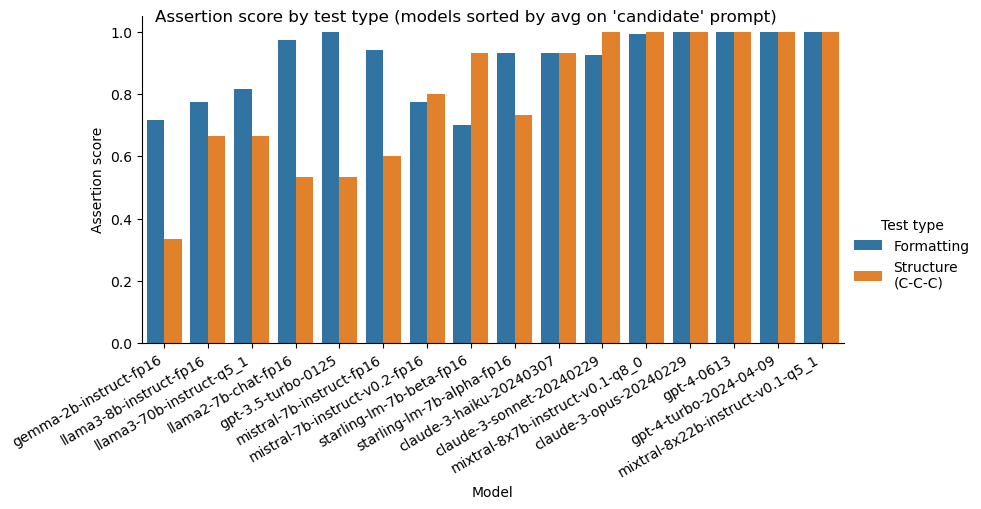

In [97]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    x="model",
    y="comp_score",
    hue="comp_type",
    hue_order=[
        # "Spelling/grammar",
        "Formatting",
        "Structure",
    ],
    kind="bar",
    order=sorted_models,
    errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.fig.suptitle(
    "Assertion score by test type (models sorted by avg on 'candidate' prompt)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion score")

# leg = g.axes.flat[0].get_legend()
# leg.set_title("")
g._legend.set_title("Test type")
new_labels = [
    # "Spelling/grammar",
    "Formatting",
    "Structure\n(C-C-C)",
]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)